In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df=pd.read_csv("RidingMowers.csv")
dum_df=pd.get_dummies(df)
dum_df.head()

,Income,Lot_Size,Response_Bought,Response_Not Bought
0,34,26,False,True
1,34,40,False,True
2,34,46,False,True
3,34,48,False,True
4,34,53,False,True


In [3]:
dum_df=dum_df.drop('Response_Not Bought',axis=1)
dum_df.head()

,Income,Lot_Size,Response_Bought
0,34,26,False
1,34,40,False
2,34,46,False
3,34,48,False
4,34,53,False


In [4]:
X=dum_df.iloc[:,0:2]
y=dum_df.iloc[:,2]

In [5]:
X.head()

,Income,Lot_Size
0,34,26
1,34,40
2,34,46
3,34,48
4,34,53


In [6]:
clf=IsolationForest(contamination=0.05,random_state=23)
clf.fit(X)

IsolationForest(contamination=0.05, random_state=23)

In [7]:
predictions=clf.predict(X)

In [8]:
print("Range of outliers= "+ str((predictions<0).mean()*100)+"%")

Range of outliers= 5.0%


In [9]:
abn_ind=np.where(predictions<0)

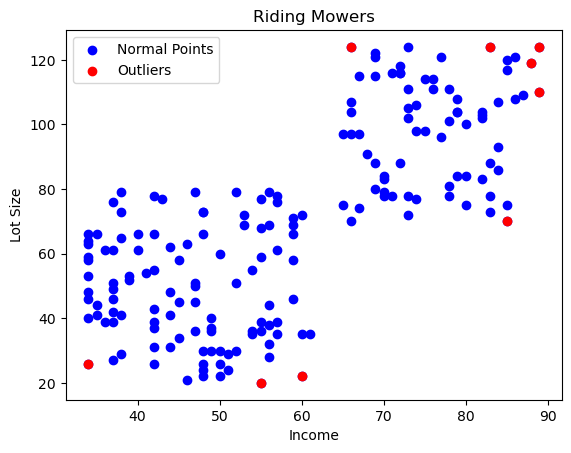

In [10]:
plt.scatter(X.Income,X.Lot_Size,c='blue',label='Normal Points')
plt.scatter(X['Income'].loc[abn_ind],X['Lot_Size'].loc[abn_ind],c='red',label='Outliers')
plt.legend()
plt.title("Riding Mowers")
plt.xlabel("Income")
plt.ylabel("Lot Size")
plt.show()

## For Milk Data

In [13]:
milk=pd.read_csv("milk.csv",index_col=0)
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [14]:
clf=IsolationForest(contamination=0.05,random_state=23)
clf.fit(milk)

IsolationForest(contamination=0.05, random_state=23)

In [15]:
predictions=clf.predict(milk)

In [16]:
print("Range of outliers= "+ str((predictions<0).mean()*100)+"%")

Range of outliers= 8.0%


In [17]:
abn_ind=np.where(predictions<0)

In [20]:
print("Outliers: ")
print(milk.index[abn_ind])

Outliers: 
Index(['SEAL', 'DOLPHIN'], dtype='object', name='Animal')
